## **Regressão Logística - base `iris`**

### **Coleta de Dados**

In [ ]:
# Manipulação de dados:
import numpy as np
import pandas as pd

# DataViz:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelagem:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# corrigindo o nome das colunas (padronização):
iris.columns = iris.columns.str.lower()
iris.head(2)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,tipo_orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


### **Análise Exploratória**

In [ ]:
linhas, colunas = iris.shape
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 150
Colunas: 5


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
 4   tipo_orquidea       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.isna().sum() / len(iris) * 100

,0
comprimento_sepala,0.0
largura_sepala,0.0
comprimento_petala,0.0
largura_petala,0.0
tipo_orquidea,0.0


In [ ]:
iris['tipo_orquidea'].value_counts()

,count
tipo_orquidea,
0,100
1,50


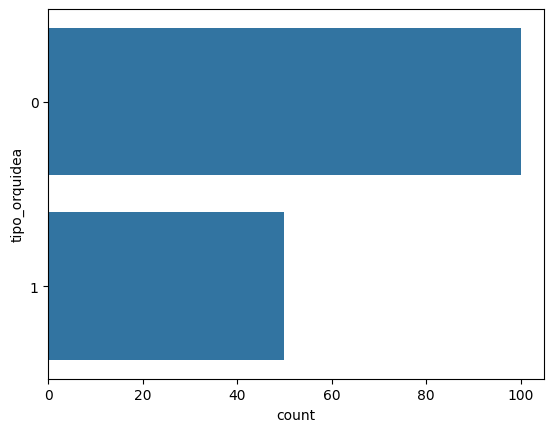

In [ ]:
sns.countplot(data=iris, y='tipo_orquidea');

In [ ]:
descritivas = iris.describe().T.round(2)
descritivas['cv'] = ( descritivas['std'] / descritivas['mean'] ).round(2)
descritivas.style.format('{:,.2f}').background_gradient(subset='cv')

,count,mean,std,min,25%,50%,75%,max,cv
comprimento_sepala,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90,0.14
largura_sepala,150.00,3.06,0.44,2.00,2.80,3.00,3.30,4.40,0.14
comprimento_petala,150.00,3.76,1.77,1.00,1.60,4.35,5.10,6.90,0.47
largura_petala,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50,0.63
tipo_orquidea,150.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00,1.42


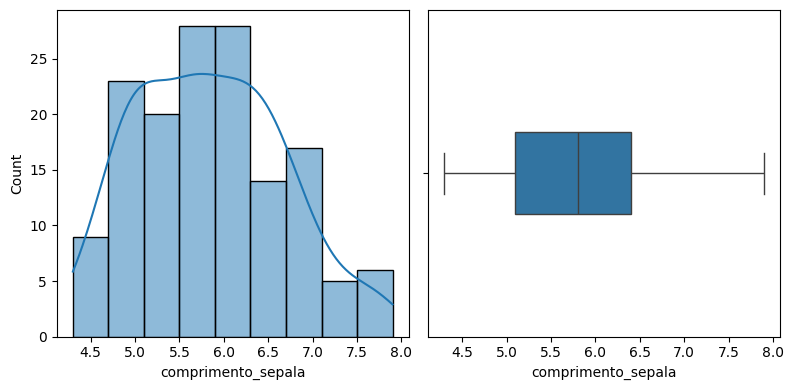

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(data=iris, x='comprimento_sepala', kde=True, ax=ax[0]);
sns.boxplot(data=iris, x='comprimento_sepala', width=0.25, ax=ax[1]);
plt.tight_layout();

* O comprimento da sépala parece seguir distribuição normal (5.84 $\pm$ 0.83)
* Cerca de 50% da base tem $w_{sepala} \leq 5.80$
* Não existem ouliters nessa variável
* A variabilidade é baixa em relação á média ($cv = 0.14$)

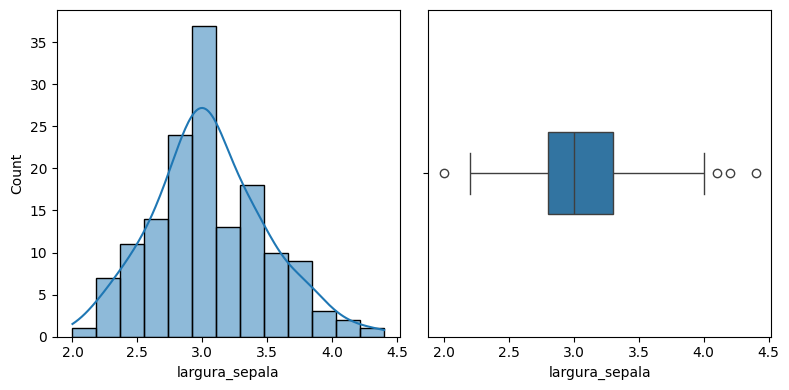

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(data=iris, x='largura_sepala', kde=True, ax=ax[0]);
sns.boxplot(data=iris, x='largura_sepala', width=0.25, ax=ax[1]);
plt.tight_layout();

* A largura da sépala parece seguir distribuição normal (3.06 $\pm$ 0.44)
* Cerca de 50% da base tem $l_{sepala} \leq 3.00$
* Existem outliers nessa variável (2; 4; 4.25; 4.5)
* A variabilidade é baixa em relação á média ($cv = 0.14$)

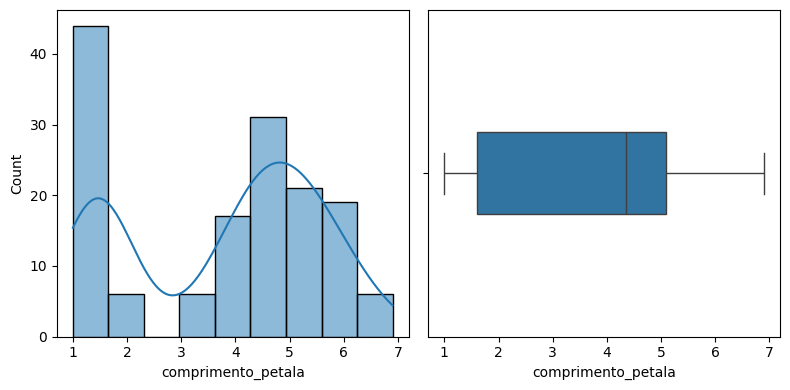

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(data=iris, x='comprimento_petala', kde=True, ax=ax[0]);
sns.boxplot(data=iris, x='comprimento_petala', width=0.25, ax=ax[1]);
plt.tight_layout();

* O comprimento da pétala é bimodal (um grupo até 2 cm e outro acima de 3 cm - ver gráfico a seguir).
* Cerca de 50% da base tem $w_{petala} \leq 4.35$
* Cerca de 75% da base tem $w_{petala} \leq 5.10$
* Não existem outliers nessa variável
* A variabilidade é um pouco mais alta alta em relação á média ($cv = 0.47$)

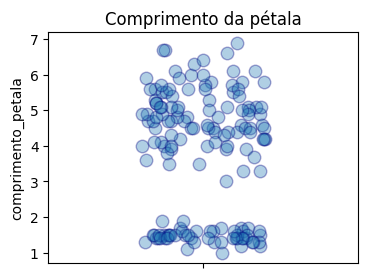

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.stripplot(data=iris, y='comprimento_petala', jitter=0.2, s=9, alpha=0.35, edgecolor='navy',  linewidth=1);
plt.title('Comprimento da pétala');

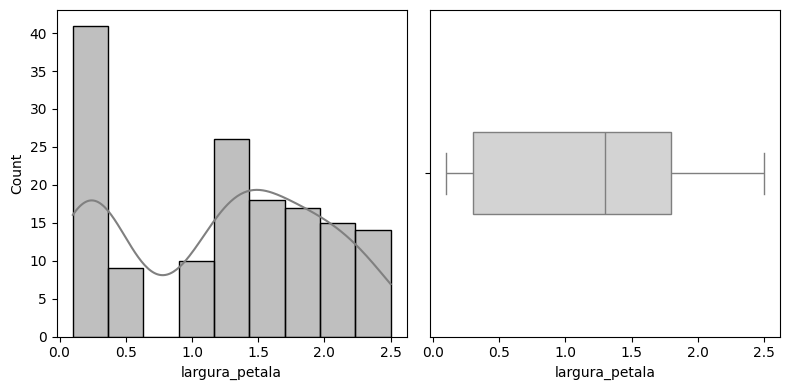

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(data=iris, x='largura_petala', color='gray', kde=True, ax=ax[0]);
sns.boxplot(data=iris, x='largura_petala', color='lightgray', width=0.25, ax=ax[1]);
plt.tight_layout();

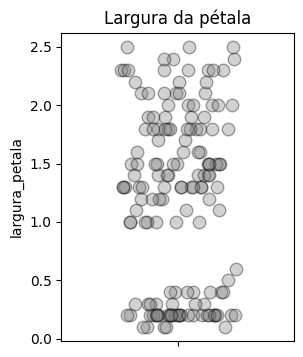

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
sns.stripplot(data=iris, y='largura_petala', jitter=0.25, s=9, alpha=0.35, color='gray', edgecolor='black',  linewidth=1);
plt.title('Largura da pétala');

* A largura da pétala é bimodal (um grupo até 0.5 cm e outro acima de 1 cm).
* Cerca de 50% da base tem $w_{petala} \leq 1.30$
* Cerca de 75% da base tem $w_{petala} \leq 1.80$
* Não existem outliers nessa variável
* A variabilidade é alta alta em relação á média ($cv = 0.63$)

In [ ]:
descritivas = iris.describe().T.round(2)
descritivas['cv'] = ( descritivas['std'] / descritivas['mean'] ).round(2)
descritivas.style.format('{:,.2f}').background_gradient(subset='cv')

,count,mean,std,min,25%,50%,75%,max,cv
comprimento_sepala,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90,0.14
largura_sepala,150.00,3.06,0.44,2.00,2.80,3.00,3.30,4.40,0.14
comprimento_petala,150.00,3.76,1.77,1.00,1.60,4.35,5.10,6.90,0.47
largura_petala,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50,0.63
tipo_orquidea,150.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00,1.42


<Axes: >

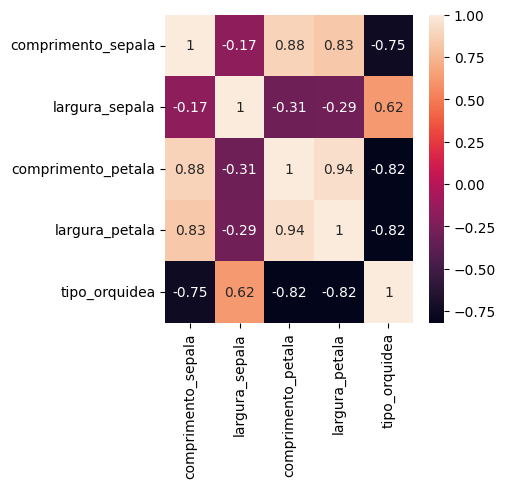

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
correlacao = iris.corr(method='spearman').round(2)
sns.heatmap(correlacao, annot=True)

* As colunas estão moderada a fortemente correlacionadas entre si. Dessa maneira, todas as variáveis tem associação quanto ao tipo de orquídea.

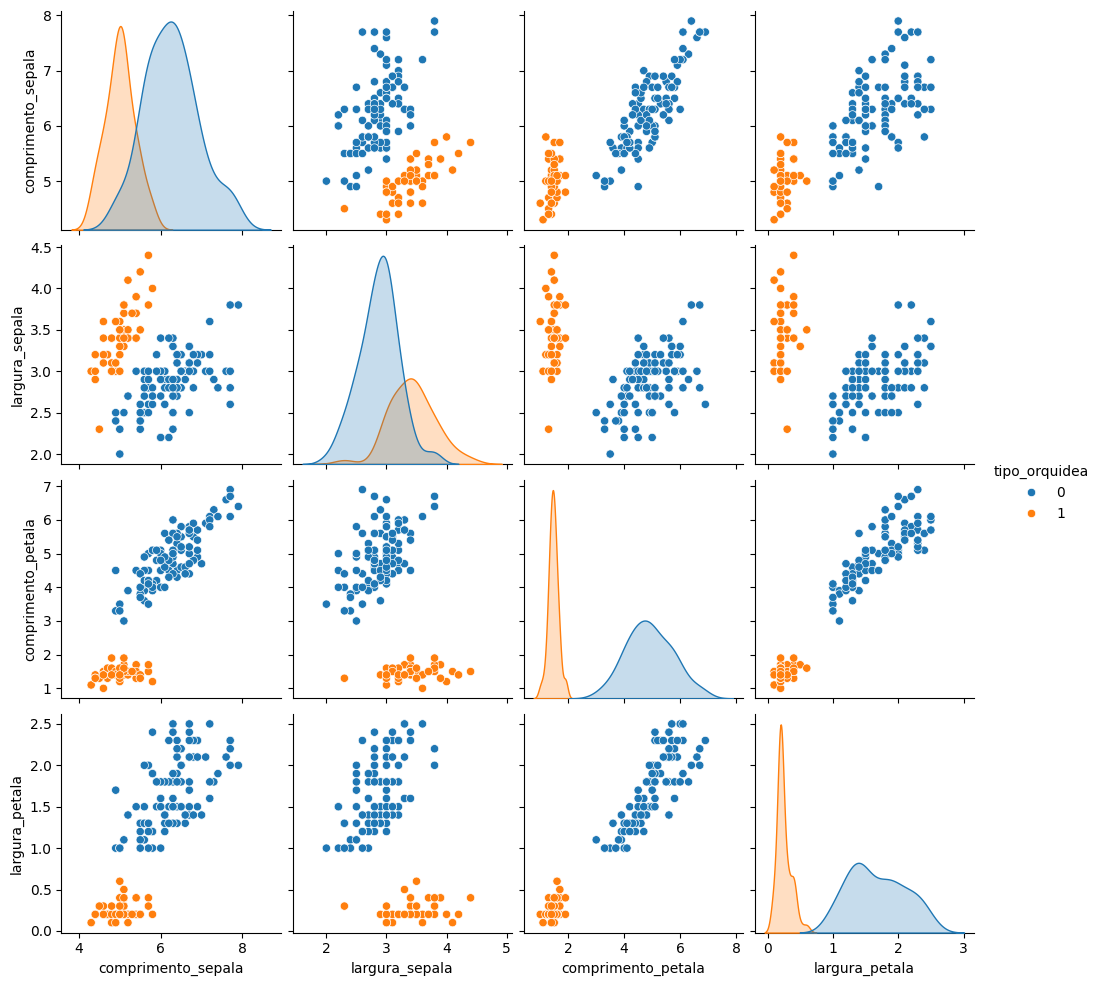

In [ ]:
sns.pairplot(iris, hue='tipo_orquidea')

* A orquídia tipo 1 tem menor lárgura e menor comprimento da pétala (pétala menor)
* A orquídia tipo 1 tem lárgura da sépala ligeiramente maior
* A orquídia tipo tem comprimento da sépala ligeiramente menor.

### **Modelagem**

In [ ]:
iris.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'tipo_orquidea'],
      dtype='object')

In [ ]:
x = iris.drop('tipo_orquidea', axis=1)
y= iris[['tipo_orquidea']]
print(f'Tamanho x: {x.shape}')
print(f'Tamanho y: {y.shape}')

Tamanho x: (150, 4)
Tamanho y: (150, 1)


In [ ]:
modelo = LogisticRegression(random_state=50, fit_intercept=True);
modelo.fit(x, y);

print(f'Intercepto: {modelo.intercept_}');
print(f'Coeficientes: {modelo.coef_}');

Intercepto: [6.68931554]
Coeficientes: [[-0.44565052  0.90054581 -2.32023343 -0.98112874]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Prediçoes do y:
iris['y_estimado'] = modelo.predict(x)
iris[['tipo_orquidea', 'y_estimado']]

,tipo_orquidea,y_estimado
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
145,0,0
146,0,0
147,0,0
148,0,0


In [ ]:
# Probabilidades primeira linha:
modelo.predict_proba(  x.iloc[0].values.reshape(1,-1) )*100

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[ 1.5924314, 98.4075686]])

In [ ]:
acuracia = accuracy_score(iris['tipo_orquidea'], iris['y_estimado'])
print(f'Acurácia: {int(acuracia*100)} %')

Acurácia: 100 %


### **Interpretação**

In [ ]:
iris.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'tipo_orquidea', 'y_estimado'],
      dtype='object')

\begin{equation}
  y = 6.69 - 0.45*w_{sepala} + 0.90*l_{sepala} -2.32*w_{petala} -0.98*l_{petala}
\end{equation}  

In [ ]:
# Aumento em uma unidade de l_sepala:
np.exp(0.90)

2.45960311115695

* Cada aumento em 1 cm na largura da sépala, aumenta em 146% a chance da orquídea ser do tipo 1

In [ ]:
# Aumento em 1 cm em w_sepala:
np.exp(-0.45)

0.6376281516217733

* Cada aumento em 1 cm no comprimento da sépala, diminui em 36% a chance da orquídea ser do tipo 1 - mantendo tudo o mais constante.

In [ ]:
np.exp(-2.32)

0.09827358560436154

* Cada aumento em 1cm no comprimento da sépala, diminui em 90% a chance da orquídea ser do tipo 1 - mantendo tudo o mais constante.

In [ ]:
np.exp(-0.98)

0.37531109885139957

* Cada aumento em 1cm na largura da pétala, diminui em 62% a chance da orquídea ser do tipo 1 - mantendo tudo o mais constante.